# Webscraping

+ In this lecture, we'll discuss webscraping
+ First isntall `requests` and  `beautifulsoup4` and `selenium` 
+ Let's take an example by trying to grab and plot the table of multiple Olympic medalists from Wikipedia then create a barplot of which sports have the most multiple medal winners

In [2]:
import requests as rq
import bs4
import pandas as pd

## Reading in the data

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_multiple_Olympic_gold_medalists'
page = rq.get(url)
## print out the first 100 characters just to see what it looks like
page.text[0 : 99]

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-l'

## Reading into BS4

+ We add the class and wikitable information to specify which tables that we want. 
+ If you want to find classes, you can use a web tool, like selectorgadget or viewing the page source.

In [4]:
bs4page = bs4.BeautifulSoup(page.text, 'html.parser')
tables = bs4page.find('table',{'class':"wikitable"})

In [5]:
medals = pd.read_html(str(tables))

## Reading into pandas

+ Now we should take the html that we've saved, then read it into pandas. 
+ Fortunately, pandas has a `read_html` method. 

In [6]:
medals = pd.read_html(str(tables))[0]
## There's an empty row
medals = medals.dropna()
medals.head()

,No.,Athlete,Nation,Sport,Years,Games,Gender,Gold,Silver,Bronze,Total
0,1,Michael Phelps,United States,Swimming,2000–2016,Summer,M,23.0,3.0,2.0,28.0
1,2,Larisa Latynina,Soviet Union,Gymnastics,1956–1964,Summer,F,9.0,5.0,4.0,18.0
2,3,Paavo Nurmi,Finland,Athletics,1920–1928,Summer,M,9.0,3.0,0.0,12.0
3,4,Mark Spitz,United States,Swimming,1968–1972,Summer,M,9.0,1.0,1.0,11.0
4,5,Carl Lewis,United States,Athletics,1984–1996,Summer,M,9.0,1.0,0.0,10.0


## Creating a plot

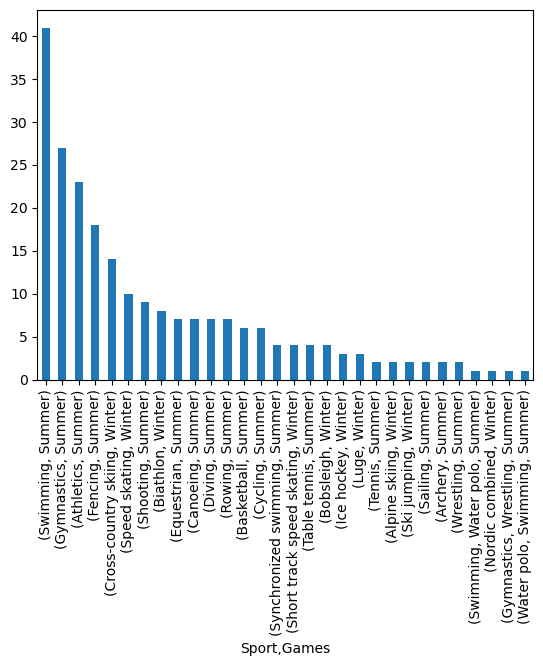

In [7]:
medals[['Sport', 'Games']].value_counts().plot.bar();